# Práctica 1.
## Visualización de la información

### Prof. Luis Miguel de la Cruz Salas

Extraer información importante de un conjunto de datos y resaltarla mediante algunas técnicas simples.

### 1. 
Incluir las bibliotecas necesarias para la lectura de datos y para la visualización

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 2. 
Obtener la información de http://data.un.org/ con la búsqueda 'fertility rate', bajar el archvio y leerlo en un DataFrame

In [2]:
fert = pd.read_csv('UNdata_Export_20200418_014346536.csv')

### 3. 
Obtener los datos de España y Suecia

In [4]:
# Primero se agrupa por país 
paises = fert.groupby('Country or Area')

In [5]:
# Después se obtienen los datos de España y Suecia
spa = paises.get_group('Spain')
swe = paises.get_group('Sweden')

In [6]:
spa

,Country or Area,Year(s),Variant,Value
3402,Spain,2015-2020,Medium,1.330
3403,Spain,2010-2015,Medium,1.325
3404,Spain,2005-2010,Medium,1.454
3405,Spain,2000-2005,Medium,1.277
3406,Spain,1995-2000,Medium,1.187
3407,Spain,1990-1995,Medium,1.280
3408,Spain,1985-1990,Medium,1.460
3409,Spain,1980-1985,Medium,1.880
3410,Spain,1975-1980,Medium,2.550
3411,Spain,1970-1975,Medium,2.850


In [7]:
swe

,Country or Area,Year(s),Variant,Value
3500,Sweden,2015-2020,Medium,1.850
3501,Sweden,2010-2015,Medium,1.902
3502,Sweden,2005-2010,Medium,1.891
3503,Sweden,2000-2005,Medium,1.670
3504,Sweden,1995-2000,Medium,1.559
3505,Sweden,1990-1995,Medium,2.006
3506,Sweden,1985-1990,Medium,1.909
3507,Sweden,1980-1985,Medium,1.644
3508,Sweden,1975-1980,Medium,1.665
3509,Sweden,1970-1975,Medium,1.906


### 4. 
Se hacen las primeras gráficas para comparar los datos de España y Suecia

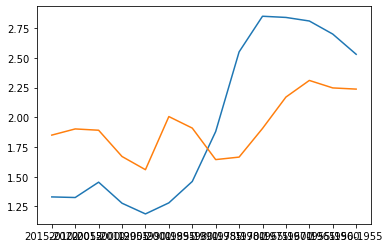

In [8]:
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])

### 4.1
Como se puede observar en la gráfica anterior, los `xtics` están amontonados, así que lo primero que haremos será una rotación de los mismos:

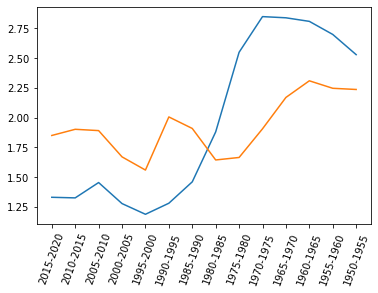

In [9]:
plt.xticks(rotation=70) # Rotación de 70 grados con respecto al eje x en sentido horario.
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])

### 4.2 
Ahora se observa en el eje $x$ tenemos la información de mayor (2015-2020) a menor (1950-1955). Vamos a invertir la información.

(14.0, -1.0)

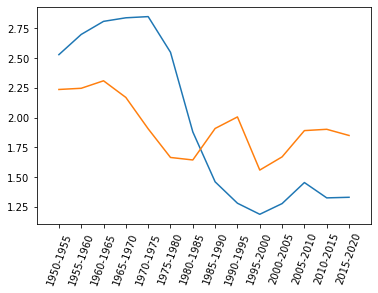

In [10]:
plt.xticks(rotation=70)
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])
plt.xlim(14,-1,-1) # Obsérvese que se tienen 14 datos (0-13), por esa razón 
                   # se grafican desde al 14 hasta el -1, con un salto de -1.

### 4.3 
Graficamos una línea recta en el valor 2.1, que es considerado en valor de reemplazo.

(14.0, -1.0)

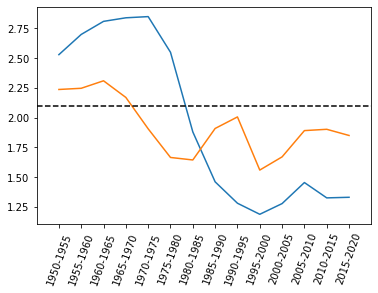

In [11]:
plt.xticks(rotation=70) 
plt.plot(spa['Year(s)'], spa['Value'])
plt.plot(swe['Year(s)'], swe['Value'])
plt.plot([14,-1],[2.1,2.1], 'k--') # Línea que muestra el valor de reemplazo,
                                   # Se usa negro y línea punteada para distinguirla.
plt.xlim(14,-1,-1)

### 4.4 
Decoramos la gráfica para tener una primera versión de esta visualización.

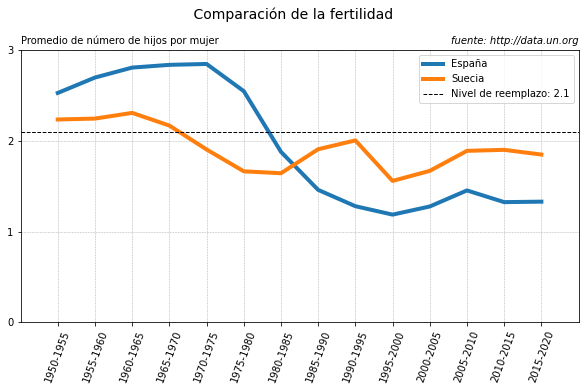

In [12]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70) 
plt.plot(spa['Year(s)'], spa['Value'], lw=4.0, label='España')
plt.plot(swe['Year(s)'], swe['Value'], lw=4.0, label='Suecia')
plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-1,-1)
plt.ylim(0,3)             # Límites en el eje y 
plt.yticks([0,1,2,3])     # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

### 4.5
Como último punto vamos a poner un texto en el extremo derecho de cada curva para identificarla. De esta manera podemos eliminar las leyendas.

Text(0, 1.85, ' Sue 1.85')

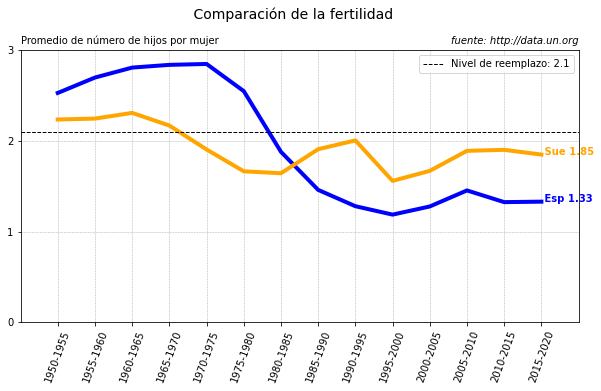

In [13]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70)
# Cambiamos el color y el ancho de las líneas
spa_color = 'blue'
swe_color = 'orange'
plt.plot(spa['Year(s)'], spa['Value'], lw=4.0, c=spa_color)
plt.plot(swe['Year(s)'], swe['Value'], lw=4.0, c=swe_color)
plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-1,-1)
plt.ylim(0,3)             # Límites en el eje y 
plt.yticks([0,1,2,3])     # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

# Texto
spa_val = spa['Value'].iloc[0]
swe_val = swe['Value'].iloc[0]
plt.text(x = 0, y = spa_val, s = ' Esp {:1.2f}'.format(spa_val), c = spa_color, weight = 'bold')
plt.text(x = 0, y = swe_val, s = ' Sue {:1.2f}'.format(swe_val), c = swe_color, weight = 'bold')


La gráfica anterior muestra como el número promedio de hijos por mujer se incrementó levemente de 1950 a 1965 para Suecia, para después reducirse por debajo del nivel de reemplazo (NR). Desde entonces ha tenido una cierta oscilación y parece que a partir de 2005 comienza a estabilizarse en un valor por debajo del NR. Algo similar sucede con España, donde el incremento fue un poco más notorio de 1950 hasta 1975, para después bajar y estabilizarse en la década pasada. ¿Qué hechos historicos se pueden correlacionar con estos datos?

Lo que se desea mostrar (la historia que se quiere contar) es que la razón de nacimientos en ambos países se ha estabilizado, lo cual nos puede llevar a que la población mundial realmente se estabilice en aproximadamente 90mil millones de seres humanos.

### 5. 
Hacemos exactamente lo mismo para México y Yemen

In [14]:
# Después se obtienen los datos de México y Yemen
mex = paises.get_group('Mexico')
yem = paises.get_group('Yemen')

### 5.1 
Obtenemos el valor máximo de fertilidad de ambos países para usarlo en los límites del eje y

In [15]:
from math import ceil
y_maximo = max(mex['Value'].max(), yem['Value'].max())
yticks = [i for i in range(0,ceil(y_maximo)+1)]
print(y_maximo, yticks)

8.8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 5.2 
Graficamos usando el mismo script que se usó en el punto 4.

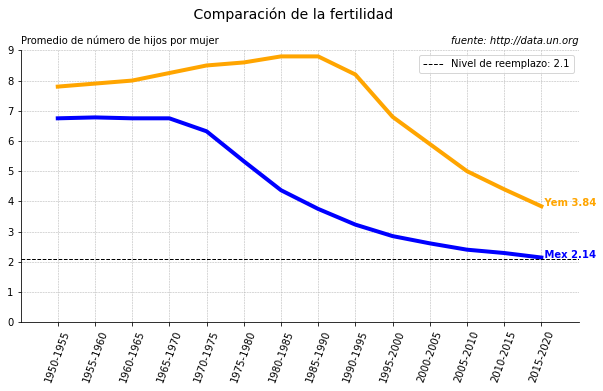

In [16]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70)
# Cambiamos el color y el ancho de las líneas
mex_color = 'blue'
yem_color = 'orange'
plt.plot(mex['Year(s)'], mex['Value'], lw=4.0, c=mex_color)
plt.plot(yem['Year(s)'], yem['Value'], lw=4.0, c=yem_color)
plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-1,-1)
plt.ylim(0, y_maximo)             # Límites en el eje y 
plt.yticks(yticks)     # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

# Texto
mex_val = mex['Value'].iloc[0]
yem_val = yem['Value'].iloc[0]
plt.text(x = 0, y = mex_val, s = ' Mex {:1.2f}'.format(mex_val), c = mex_color, weight = 'bold')
plt.text(x = 0, y = yem_val, s = ' Yem {:1.2f}'.format(yem_val), c = yem_color, weight = 'bold')

# Líneas de los ejes
ejes = fig.axes
ejes[0].spines['right'].set_visible(False)
ejes[0].spines['top'].set_visible(False)

Observamos en la gráfica anterior, que la fertilidad en México y Yemen son mayores a España y Suecia.

¿Qué más puede decir de estas curvas con respecto de las de España y Suecia?

### 6. 
Graficamos los cuatro países juntos para comparar la información.

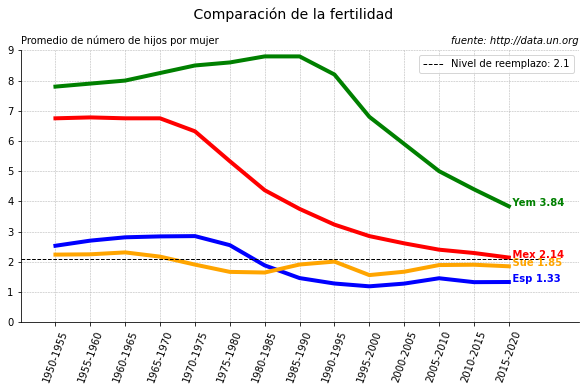

In [20]:
fig = plt.figure(figsize=(10,5)) # Cambiamos el tamaño de la figura
plt.xticks(rotation=70)
# Cambiamos el color y el ancho de las líneas
spa_color = 'blue'
swe_color = 'orange'
mex_color = 'red'
yem_color = 'green'
plt.plot(spa['Year(s)'], spa['Value'], lw=4.0, c=spa_color)
plt.plot(swe['Year(s)'], swe['Value'], lw=4.0, c=swe_color)
plt.plot(mex['Year(s)'], mex['Value'], lw=4.0, c=mex_color)
plt.plot(yem['Year(s)'], yem['Value'], lw=4.0, c=yem_color)

plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1') 
plt.xlim(14,-2,-1)
plt.ylim(0,y_maximo)   # Límites en el eje y (usamos y_maximo)
plt.yticks(yticks)     # Marcas en el eje y
plt.grid(ls='--', lw=0.5) # Rejilla

# Información adicional y títulos
plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
plt.suptitle(' Comparación de la fertilidad',y = 1.0, fontsize=14)
plt.legend()

# Texto
spa_val = spa['Value'].iloc[0]
swe_val = swe['Value'].iloc[0]
mex_val = mex['Value'].iloc[0]
yem_val = yem['Value'].iloc[0]
plt.text(x = 0, y = spa_val, s = ' Esp {:1.2f}'.format(spa_val), c = spa_color, weight = 'bold')
plt.text(x = 0, y = swe_val, s = ' Sue {:1.2f}'.format(swe_val), c = swe_color, weight = 'bold')
plt.text(x = 0, y = mex_val, s = ' Mex {:1.2f}'.format(mex_val), c = mex_color, weight = 'bold')
plt.text(x = 0, y = yem_val, s = ' Yem {:1.2f}'.format(yem_val), c = yem_color, weight = 'bold')

ejes = fig.axes
ejes[0].spines['right'].set_visible(False)
ejes[0].spines['top'].set_visible(False)


¿Cómo se comparan estas gráficas? ¿Qué se puede pensar de los países que tienen un índice de fertilidad que está por arriba del factor NR? ¿Cómo podrían impactar los cuestiones históricas y geográficas de esos países en su fertilidad? ¿Qué más observa en estas gráficas?

### 7. 
Vamos ahora a graficar todos los países.

In [21]:
# La lista de paises se obtiene con paises.groups.keys(), por ejemplo:
for p in paises.groups.keys():
    print(p, end=', ')

Afghanistan, Africa, Albania, Algeria, American Samoa, Andorra, Angola, Anguilla, Antigua and Barbuda, Argentina, Armenia, Aruba, Asia, Australia, Australia/New Zealand, Austria, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bermuda, Bhutan, Bolivia (Plurinational State of), Bonaire, Sint Eustatius and Saba, Bosnia and Herzegovina, Botswana, Brazil, British Virgin Islands, Brunei Darussalam, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Caribbean, Cayman Islands, Central African Republic, Central America, Central Asia, Central and Southern Asia, Chad, Channel Islands, Chile, China, China, Hong Kong SAR, China, Macao SAR, Colombia, Comoros, Congo, Cook Islands, Costa Rica, Croatia, Cuba, Curaçao, Cyprus, Czechia, Côte d'Ivoire, Dem. People's Republic of Korea, Democratic Republic of the Congo, Denmark, Djibouti, Dominica, Dominican Republic, Eastern Africa, Eastern Asia, Eastern Europe, Eastern and South-Eastern Asia, Ecu

In [24]:
# Definimos una función para inicializar el entorno de la gráfica.
def inicializaGrafica(y_maximo, yticks):
    fig = plt.figure(figsize=(10,10)) # Cambiamos el tamaño de la figura
    plt.xticks(rotation=70)
    plt.xlim(14,-2,-1)
    plt.ylim(0,y_maximo)   # Límites en el eje y (usamos y_maximo)
    plt.yticks(yticks)     # Marcas en el eje y
    plt.grid(ls='--', lw=0.5) # Rejilla

    # Información adicional y títulos
    plt.title('Promedio de número de hijos por mujer', loc='left', fontsize=10)
    plt.title('fuente: http://data.un.org', loc='right', fontstyle='italic', fontsize=10)
    plt.suptitle(' Comparación de la fertilidad', y = 0.94, fontsize=14)

    ejes = fig.axes
    ejes[0].spines['right'].set_visible(False)
    ejes[0].spines['top'].set_visible(False)
    ejes[0].spines['left'].set_visible(False)
    ejes[0].spines['bottom'].set_visible(False)
    
# Definimos una función para graficar
def graficaFertilidad(paises, parametros={}):
    for p in paises.groups.keys():
        pais = paises.get_group(p)
        plt.plot(pais['Year(s)'], pais['Value'], **parametros)
    plt.plot([14,-1],[2.1,2.1], 'k--', lw=1.0, label='Nivel de reemplazo: 2.1')
    plt.legend()

In [25]:
y_maximo = 0
for p in paises.groups.keys():
    temporal = paises.get_group(p)['Value'].max()
    if y_maximo < temporal:
        y_maximo = temporal
yticks = [i for i in range(0,ceil(y_maximo)+1)]
print(y_maximo, yticks)

8.8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


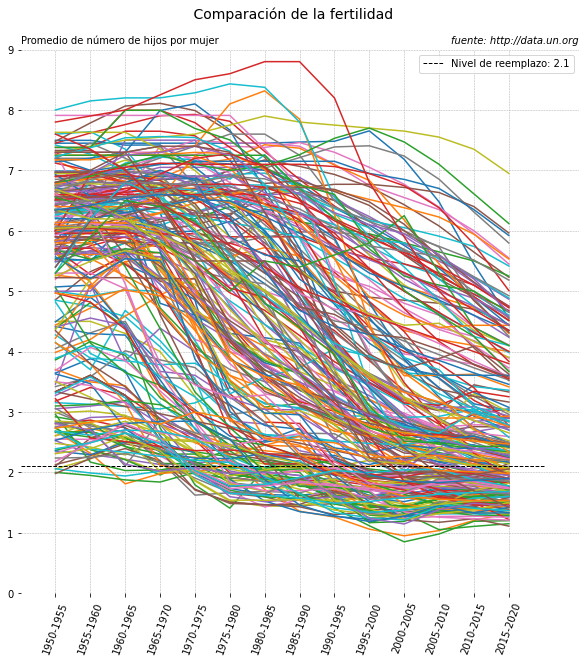

In [26]:
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises)

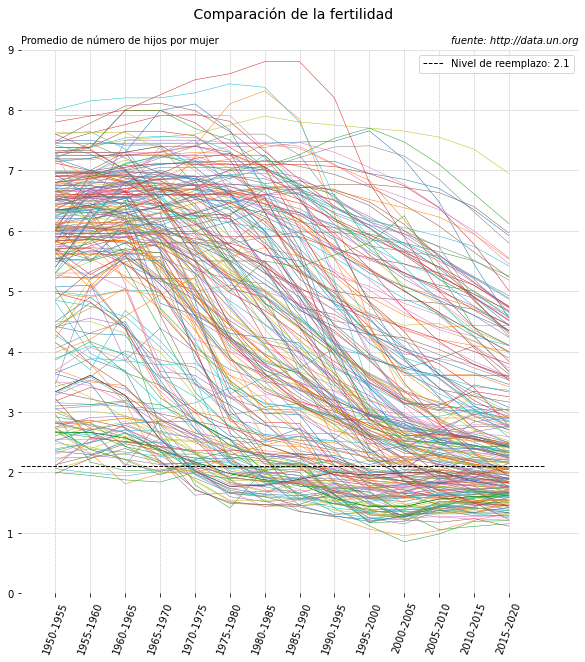

In [27]:
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5})

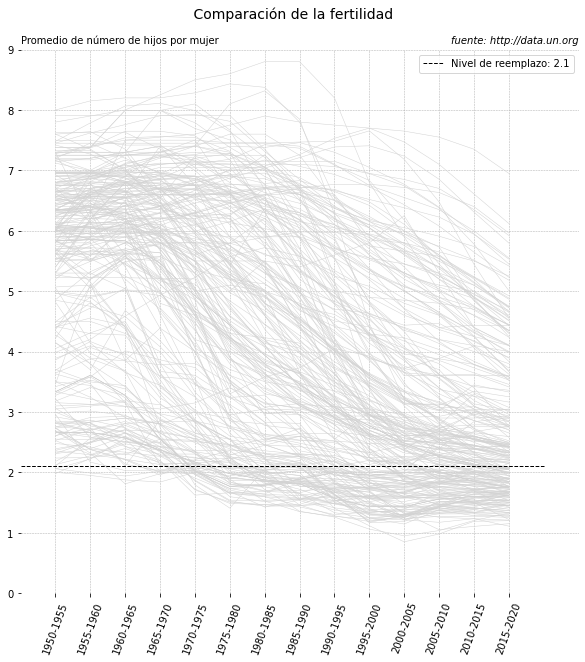

In [28]:
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5, 'c':'lightgrey'})

In [34]:
# Definimos una función para graficar un solo país con parámetros para realce 
def graficaFertilidadUnPais(paises, p, parametros={}):
    pais = paises.get_group(p)
    pais_val = pais['Value'].iloc[0]
    plt.plot(pais['Year(s)'], pais['Value'], **parametros)
    plt.text(x = 0, y = pais_val, 
             s = ' {} {:1.2f}'.format(p, pais_val), 
             c = parametros['c'], weight = 'bold')
    pais_val = pais['Value'].iloc[-1]    
    plt.text(x = 14, y = pais_val, 
             s = '{:1.2f} '.format(pais_val), 
             c = parametros['c'], weight = 'bold')


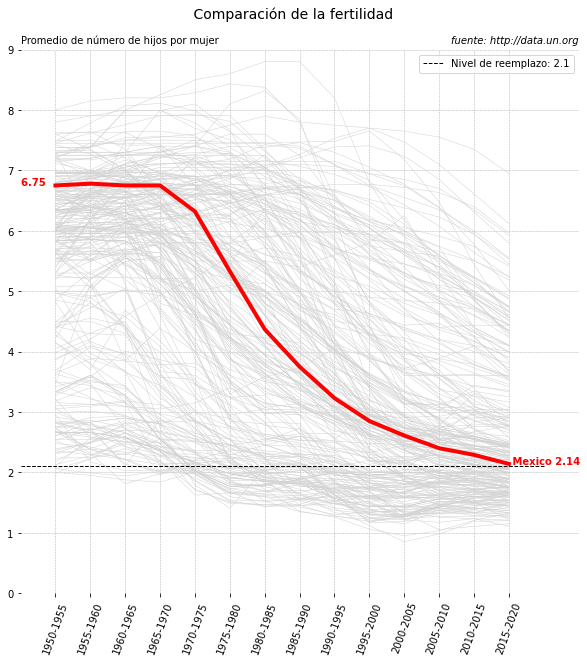

In [35]:
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5, 'c':'lightgrey'})

par_mex = {'lw':4.0, 'c':'red'}
graficaFertilidadUnPais(paises, 'Mexico', par_mex)

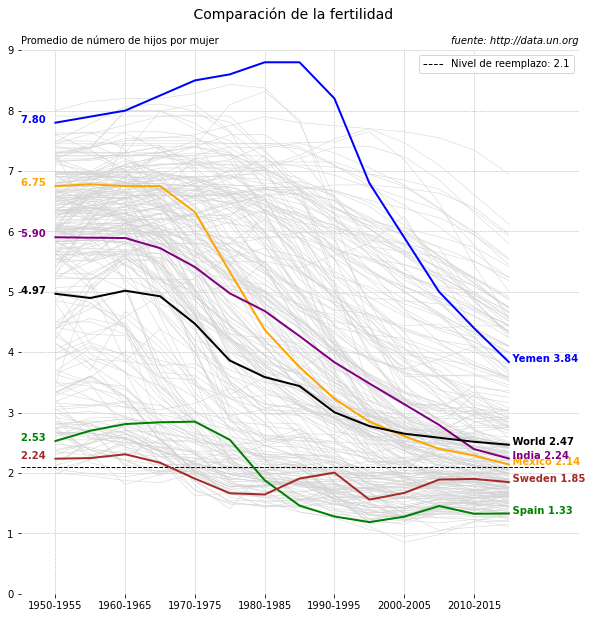

In [37]:
inicializaGrafica(y_maximo, yticks)
graficaFertilidad(paises, {'lw':0.5, 'c':'lightgrey'})

colores = ['orange', 'blue', 'green', 'brown', 'purple','black']
paises_l = ['Mexico', 'Yemen', 'Spain', 'Sweden', 'India', 'World']
for p, c in zip(paises_l, colores):
    par = {'lw':2.0, 'c':c}
    graficaFertilidadUnPais(paises, p, par)
plt.xticks([13, 11, 9, 7, 5, 3, 1], rotation=0)
plt.savefig('fertilidad.pdf')